In [1]:
import numpy as np
import seaborn as sns

sns.set_palette("muted")
sns.set_style("whitegrid")

In [2]:
def generate_mix(n, ratios, params_list):
    rnorms = [
        np.random.normal(params[0], params[1], round(n * ratio))
        for params, ratio in zip(params_list, ratios)
    ]
    mix = np.concatenate(rnorms)
    np.random.shuffle(mix)
    return mix

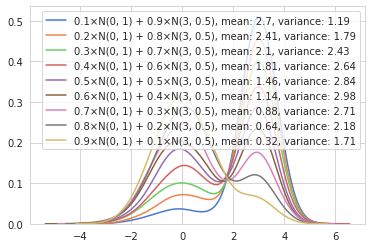

In [3]:
n = 1000
ratios_list = [
    [0.1, 0.9],
    [0.2, 0.8],
    [0.3, 0.7],
    [0.4, 0.6],
    [0.5, 0.5],
    [0.6, 0.4],
    [0.7, 0.3],
    [0.8, 0.2],
    [0.9, 0.1],
]
params_list = [(0, 1), (3, 0.5)]
mixes = []

for ratios in ratios_list:
    mix = generate_mix(n, ratios, params_list)
    mixes.append(mix)
    mix_strs = [
        f"{ratio}×N({params[0]}, {params[1]})"
        for params, ratio in zip(params_list, ratios)
    ]
    mix_legend = (
        " + ".join(mix_strs)
        + f", mean: {round(np.mean(mix), 2)}, variance: {round(np.var(mix), 2)}"
    )
    _ = sns.kdeplot(mix, bw=0.5, label=mix_legend)

In [4]:
def sprt(alpha, beta, mean0, mean1, values):
    upper_critical = np.log((1 - beta) / alpha)
    lower_critical = np.log(beta / (1 - alpha))
    variance = np.var(values)
    cumulative_sum = 0
    step = 0
    while cumulative_sum > lower_critical and cumulative_sum < upper_critical:
        x = values[step]
        cumulative_sum += log_likelihood(x, mean0, mean1, variance)
        step += 1
    decision = "H1" if cumulative_sum >= upper_critical else "H0"
    return (decision, step)

In [5]:
def log_likelihood(x, mean0, mean1, variance):
    result = (np.square(x - mean0) - np.square(x - mean1)) / (2 * variance)
    return result

In [6]:
h0_decisions = []
h1_decisions = []

for i in range(5):
    print(f"\n=== Test iteration #{i + 1} ===")
    for ratios, mix in zip(ratios_list, mixes):
        decision, sample_size = sprt(alpha=0.05, beta=0.2, mean0=1, mean1=2, values=mix)
        print(f"ratios: {ratios}\t-\tdecision: accept {decision}\t-\tsample size: {sample_size}")
        if decision == "H0":
            h0_decisions.append(sample_size)
        else:
            h1_decisions.append(sample_size)

h0_avg = round(sum(h0_decisions) / len(h0_decisions), 2)
h1_avg = round(sum(h1_decisions) / len(h1_decisions), 2)
print(f"\nH0 average sample size: {h0_avg}")
print(f"H1 average sample size: {h1_avg}")


=== Test iteration #1 ===
ratios: [0.1, 0.9]	-	decision: accept H1	-	sample size: 3
ratios: [0.2, 0.8]	-	decision: accept H1	-	sample size: 4
ratios: [0.3, 0.7]	-	decision: accept H1	-	sample size: 9
ratios: [0.4, 0.6]	-	decision: accept H1	-	sample size: 11
ratios: [0.5, 0.5]	-	decision: accept H1	-	sample size: 39
ratios: [0.6, 0.4]	-	decision: accept H0	-	sample size: 13
ratios: [0.7, 0.3]	-	decision: accept H0	-	sample size: 3
ratios: [0.8, 0.2]	-	decision: accept H0	-	sample size: 6
ratios: [0.9, 0.1]	-	decision: accept H0	-	sample size: 3

=== Test iteration #2 ===
ratios: [0.1, 0.9]	-	decision: accept H1	-	sample size: 3
ratios: [0.2, 0.8]	-	decision: accept H1	-	sample size: 4
ratios: [0.3, 0.7]	-	decision: accept H1	-	sample size: 9
ratios: [0.4, 0.6]	-	decision: accept H1	-	sample size: 11
ratios: [0.5, 0.5]	-	decision: accept H1	-	sample size: 39
ratios: [0.6, 0.4]	-	decision: accept H0	-	sample size: 13
ratios: [0.7, 0.3]	-	decision: accept H0	-	sample size: 3
ratios: [0.8